## Import Libraries  

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


## Read the dataset

In [21]:
df = pd.read_csv('stocks/W.csv')

In [22]:
# take close column
data = df['Close']

In [23]:
data.head()

0    37.720001
1    32.180000
2    32.799999
3    32.820000
4    31.049999
Name: Close, dtype: float64

## Walk Forward Methodology

In [24]:
def walk_forward_methodology(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [25]:
# take three past days data as input
dataX,dataY =  walk_forward_methodology(data,3)

## Split dataset into the train (80%) and test (20%)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(dataX,dataY,test_size=0.2,shuffle=False)

In [27]:
x_train

array([[ 37.72000122,  32.18000031,  32.79999924],
       [ 32.18000031,  32.79999924,  32.81999969],
       [ 32.79999924,  32.81999969,  31.04999924],
       ...,
       [120.12999725, 117.98999786, 117.27999878],
       [117.98999786, 117.27999878, 149.94999695],
       [117.27999878, 149.94999695, 160.27999878]])

## Linear Regression

In [28]:
# Initialize linear regression model
LinearRegression = LinearRegression()

In [29]:
#train the linear regression model
LinearRegression.fit(x_train,y_train)

LinearRegression()

In [30]:
# predicted on the test dataset
y_pred = LinearRegression.predict(x_test)

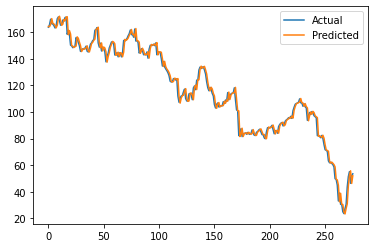

In [31]:
# Plot predicted on the test set vs real values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

## Random Forest Regressor

In [32]:
# Initialize random forest regressor model
RandomForestRegressor = RandomForestRegressor(max_depth=2, random_state=0)

In [33]:
#train the random forest regressor model
RandomForestRegressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [34]:
# predicted on the test dataset
y_pred = RandomForestRegressor.predict(x_test)

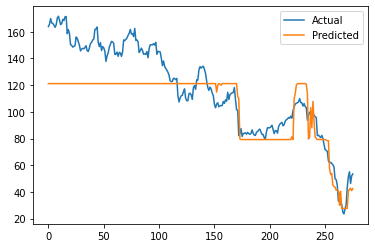

In [35]:
# Plot predicted on the test set vs real values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

## **LSTM-DNN**

In [46]:


model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, input_shape=(3,1),return_sequences=True),
    tf.keras.layers.LSTM(200),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),

])
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 3, 100)            40800     
                                                                 
 lstm_31 (LSTM)              (None, 200)               240800    
                                                                 
 dense_27 (Dense)            (None, 128)               25728     
                                                                 
 dense_28 (Dense)            (None, 1)                 129       
                                                                 
Total params: 307,457
Trainable params: 307,457
Non-trainable params: 0
_________________________________________________________________


In [37]:
#train the lstm-dnn model
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
35/35 [==============================] - 6s 16ms/step - loss: 2900.6228 - mse: 2900.6228
Epoch 2/50
35/35 [==============================] - 1s 15ms/step - loss: 985.1206 - mse: 985.1206
Epoch 3/50
35/35 [==============================] - 1s 15ms/step - loss: 699.6918 - mse: 699.6918
Epoch 4/50
35/35 [==============================] - 1s 15ms/step - loss: 166.9327 - mse: 166.9327
Epoch 5/50
35/35 [==============================] - 1s 17ms/step - loss: 82.7964 - mse: 82.7964
Epoch 6/50
35/35 [==============================] - 1s 17ms/step - loss: 63.1101 - mse: 63.1101
Epoch 7/50
35/35 [==============================] - 1s 16ms/step - loss: 62.5910 - mse: 62.5910
Epoch 8/50
35/35 [==============================] - 1s 16ms/step - loss: 59.3163 - mse: 59.3163
Epoch 9/50
35/35 [==============================] - 1s 15ms/step - loss: 61.2554 - mse: 61.2554
Epoch 10/50
35/35 [==============================] - 1s 16ms/step - loss: 59.5946 - mse: 59.5946
Epoch 11/50
35/35 [==========

In [19]:
# predicted on the test dataset
y_pred = model.predict(x_test)

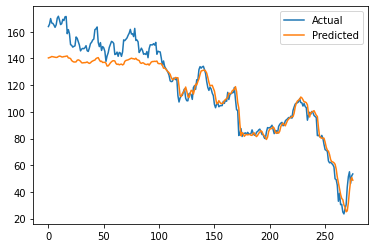

In [20]:
# Plot predicted on the test set vs real values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

## **1D-CNN-LSTM-DNN**

In [21]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

# Initialize and build the lstm-dnn model
model = Sequential()

#cnn layers
model.add(layers.Conv1D(32, kernel_size=1, activation='relu', padding='same', input_shape=(1,1,3)))
model.add(layers.Conv1D(64, kernel_size=1, activation='relu', padding='same'))
model.add(layers.Dropout(0.2))

#reshape the dataset to pass lstm
model.add(layers.Reshape((1,64)))

#lstm layers
model.add(layers.LSTM(100,return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(200))
model.add(layers.Dropout(0.5))

#dnn layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
model.summary()


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 1, 32)          128       
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 1, 64)          2112      
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 64)          0         
                                                                 
 reshape (Reshape)           (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 100)            66000     
                                                                 
 dropout_3 (Dropout)         (None, 1, 100)            0         
                  

In [22]:
#reshape dataset for cnn input
x_train_cnn = x_train.reshape(x_train.shape[0],1,1,x_train.shape[1])
x_test_cnn = x_test.reshape(x_test.shape[0],1,1,x_test.shape[1])

In [23]:
#train the cnn-lstm-dnn model
history = model.fit(x_train_cnn,y_train,epochs=50)

Epoch 1/50
 1/35 [..............................] - ETA: 3s - loss: 6044.2271 - mse: 6044.2271

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


35/35 [==============================] - 2s 48ms/step - loss: 3580.9304 - mse: 3580.9304
Epoch 2/50
35/35 [==============================] - 2s 47ms/step - loss: 1021.0659 - mse: 1021.0659
Epoch 3/50
35/35 [==============================] - 2s 47ms/step - loss: 926.4449 - mse: 926.4449
Epoch 4/50
35/35 [==============================] - 2s 46ms/step - loss: 515.1039 - mse: 515.1039
Epoch 5/50
35/35 [==============================] - 2s 46ms/step - loss: 192.4723 - mse: 192.4723
Epoch 6/50
35/35 [==============================] - 2s 44ms/step - loss: 149.3488 - mse: 149.3488
Epoch 7/50
35/35 [==============================] - 2s 48ms/step - loss: 160.9931 - mse: 160.9931
Epoch 8/50
35/35 [==============================] - 2s 47ms/step - loss: 175.1109 - mse: 175.1109
Epoch 9/50
35/35 [==============================] - 2s 47ms/step - loss: 150.7081 - mse: 150.7081
Epoch 10/50
35/35 [==============================] - 2s 46ms/step - loss: 127.7695 - mse: 127.7695
Epoch 11/50
35/35 [=======

In [24]:
y_pred = model.predict(x_test_cnn)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


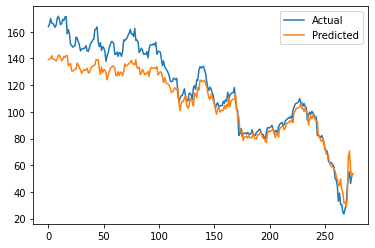

In [25]:
# Plot predicted on the test set vs real values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()